In [1]:
# !pip install pytrends
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
from pytrends.request import TrendReq
import time
import pandas as pd
import matplotlib
import gtrend   

plt.style.use('seaborn-darkgrid')
matplotlib.rcParams['font.family'] = ['Heiti TC']
def rmax(maxrow: int=50):
    pd.set_option('display.max_rows', maxrow)

def cmax(maxcol: int=50):
    pd.set_option('display.max_columns', maxcol)

Setup the query terms and conditions

Keywords to be used:
* Bitcoin (BTC) 
* Ethereum (ETH) 
* Tether (USDT) 
* Binance Coin (BNB)
* USD Coin (USDC) 
* Solana (SOL)
* XRP (XRP)
* Terra (LUNA)
* Cardano (ADA)
* Avalanche (AVAX)
* Polkadot (DOT)
* Dogecoin (DOGE)

In [8]:
#Trying out just bitcoin to start
pytrend = TrendReq(hl='en-US')
keyword = 'bitcoin'
start = '2017-01-01'
end = '2021-11-23'
geo='US'
cat=0
gprop=''
requests_args={'verify':False}

In [7]:
single_names = ["bitcoin","ethereum","tether","binance coin", "usd coin"]

In [5]:
# For the loop for different coins

# dicti = {}
# for keyword in single_names:
#     try:
#         pytrends.build_payload(kw_list=keyword,
#                               timeframe = DATE_INTERVAL,
#                               cat=CATEGORY,
#                               gprop='')
#         dicti[keyword] =pytrends.interest_over_time()
#         time.sleep(6)
#     except requests.exceptions.Timeout:
#         print('Timeout occured')
#         df_trends = pd.concat(dicti,axis=1)
#         df_trends.head()

In [20]:
dicti = {}
for keyword in single_names:
    dicti[keyword] = gtrend.get_daily_trend(pytrend, keyword, start, end, geo=geo, cat=cat, gprop=gprop, verbose=True, tz=0).iloc[:,0]

Fetching 'bitcoin' for period:2021-02-27 2021-11-23
Fetching 'bitcoin' for period:2020-09-11 2021-06-07
Normalize by overlapping period:2021-02-27 2021-06-07
Fetching 'bitcoin' for period:2020-03-26 2020-12-20
Normalize by overlapping period:2020-09-11 2020-12-20
Fetching 'bitcoin' for period:2019-10-09 2020-07-04
Normalize by overlapping period:2020-03-26 2020-07-04
Fetching 'bitcoin' for period:2019-04-23 2020-01-17
Normalize by overlapping period:2019-10-09 2020-01-17
Fetching 'bitcoin' for period:2018-11-05 2019-08-01
Normalize by overlapping period:2019-04-23 2019-08-01
Fetching 'bitcoin' for period:2018-05-20 2019-02-13
Normalize by overlapping period:2018-11-05 2019-02-13
Fetching 'bitcoin' for period:2017-12-02 2018-08-28
Normalize by overlapping period:2018-05-20 2018-08-28
Fetching 'bitcoin' for period:2017-06-16 2018-03-12
Normalize by overlapping period:2017-12-02 2018-03-12
Fetching 'bitcoin' for period:2016-12-29 2017-09-24
Normalize by overlapping period:2017-06-16 2017-

KeyError: "['isPartial'] not found in axis"

Acquire daily google trend data for over 9 month by concatenating multiple queries, and normalize(scaling) by the overlapping period (overlapping method)

1) collect all of the daily SVI data you need in 90 day increments and combine them into a single increment covering the entire time period of interest. 

2) line up the data for the same entire time period, but aggregated at a weekly level to get the weekly SVI. Determine an adjustment factor which is done by dividing the weekly SVI with the daily SVI value where the dates overlap. 

3) multiple the daily SVI values by the adjustment factor14. In cases when the SVI was less than 1, the value was returned by the Google Trends query as < 1. To allow for an adjustment calculation we changed that value to 0.5. Google does not provide any more information on what the specific value was, so the halfway value of 0.5 was used as a substitute. As we did when collecting tweets, we elected to collect Google Trends data using the least ambiguous terms as possible which were ”bitcoin” and ”ethereum”. Each currency’s abbreviation, ”BTC” and ”ETH” respectively were not used.


In [12]:
overlapping = gtrend.get_daily_trend(pytrend, keyword, start, end, geo=geo, cat=cat, gprop=gprop, verbose=True, tz=0)

Fetching 'bitcoin' for period:2021-02-27 2021-11-23
Fetching 'bitcoin' for period:2020-09-11 2021-06-07
Normalize by overlapping period:2021-02-27 2021-06-07
Fetching 'bitcoin' for period:2020-03-26 2020-12-20
Normalize by overlapping period:2020-09-11 2020-12-20
Fetching 'bitcoin' for period:2019-10-09 2020-07-04
Normalize by overlapping period:2020-03-26 2020-07-04
Fetching 'bitcoin' for period:2019-04-23 2020-01-17
Normalize by overlapping period:2019-10-09 2020-01-17
Fetching 'bitcoin' for period:2018-11-05 2019-08-01
Normalize by overlapping period:2019-04-23 2019-08-01
Fetching 'bitcoin' for period:2018-05-20 2019-02-13
Normalize by overlapping period:2018-11-05 2019-02-13
Fetching 'bitcoin' for period:2017-12-02 2018-08-28
Normalize by overlapping period:2018-05-20 2018-08-28
Fetching 'bitcoin' for period:2017-06-16 2018-03-12
Normalize by overlapping period:2017-12-02 2018-03-12
Fetching 'bitcoin' for period:2016-12-29 2017-09-24
Normalize by overlapping period:2017-06-16 2017-

In [88]:
data = pd.DataFrame()
for keyword in dicti.keys():
    data[keyword] = dicti[keyword]

<AxesSubplot:xlabel='date'>

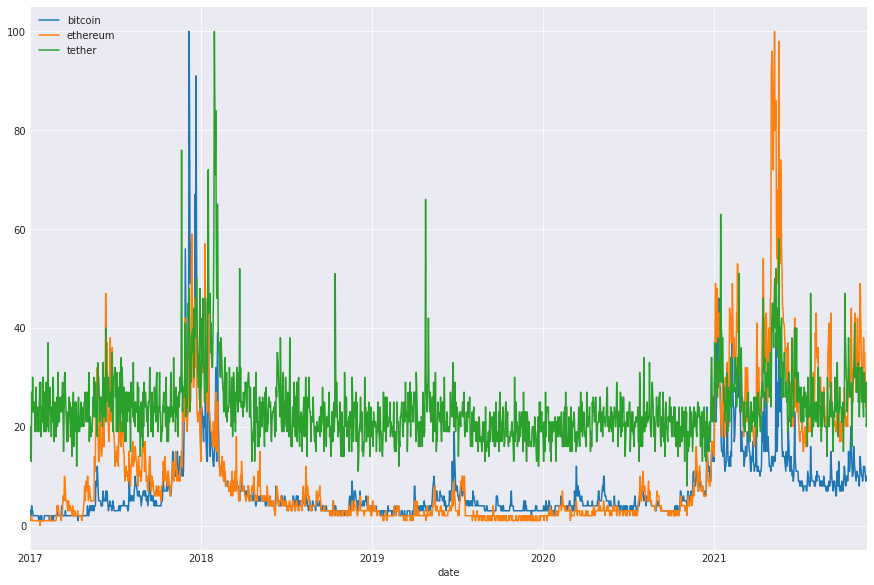

In [29]:
data.plot(figsize = (15,10))

In [31]:
data.corr()

,bitcoin,ethereum,tether
bitcoin,1.000000,0.673608,0.535010
ethereum,0.673608,1.000000,0.521053
tether,0.535010,0.521053,1.000000


In [32]:
import scipy.stats as stats

stats.pearsonr(data["bitcoin"],data["ethereum"])

(0.6736084285061446, 8.689609915657394e-237)

Acquire daily google trend data for over 9 month by concatenating multiple non-overlapping queries of 1-month, and normalize(scaling) by weekly trend value of the same period. (pytrends dailydata.py method)

In [ ]:
from pytrends import dailydata

start_d = datetime.strptime(start, '%Y-%m-%d')
end_d = datetime.strptime(end, '%Y-%m-%d')
s_year = start_d.year
s_mon = start_d.month
e_year = end_d.year
e_mon = end_d.month

dailydata = dailydata.get_daily_data(word= keyword,
                 start_year= s_year,
                 start_mon= s_mon,
                 stop_year= e_year,
                 stop_mon= e_mon,
                 geo= geo,
                 verbose= False,
                 wait_time = 1.0)
requests_args={'verify':False}

In [ ]:
print(dailydata.columns)
dailydata[f'{keyword}'].plot(figsize=(15,10))

The weekly trend data might be a reference for comparing above normalization methods. For query period between 269 days (~9months) and 5 years, google trend will return weely data. To have comparable axis scale, the weekly data is interpolated to obtain daily data.

In [ ]:
tf = start_d.strftime('%Y-%m-%d')+' '+end_d.strftime('%Y-%m-%d')
pytrend.build_payload(kw_list=[keyword], cat=cat, geo=geo, gprop=gprop, timeframe=tf)
week = pytrend.interest_over_time()
week_interp = week.resample('D').mean()
week_interp[f'{keyword}'] = week_interp[f'{keyword}'].interpolate()

In [ ]:
week_interp.drop(columns='isPartial', inplace=True)

In [ ]:
week_interp.plot(figsize=(15,10))

For better visual comparison, let's put all 3 dataset together.

In [ ]:
overlapping.loc[:,keyword]

In [ ]:
overlapping.columns

In [ ]:
combined = pd.concat([overlapping, dailydata.loc[:,keyword], week_interp], axis=1)

# combined = combined.rename(columns={'bitcoin': 'overlapping method', 'overlap': 'overlap period','bitcoin': 'dailydata method','bitcoin': 'weekly data'})
# column=[overlapping method,overlap period,dailydata method,weekly data]

In [ ]:
combined.tail(10)

In [ ]:
combined.columns = ['overlapping method','overlap period', 'dailydata method', 'weekly data']
combined = combined.resample('D').mean()

In [ ]:
combined.tail(10)

In [ ]:
import matplotlib.dates as mdates
from cycler import cycler
from matplotlib.cm import get_cmap

combined2 = combined.iloc[:, [0,2,3,1]]
combined2.index = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in combined2.index]
# c = ['royalblue', 'darkorange', 'limegreen', 'salmon']
# colors = plt.cm.Paired(np.linspace(0,1,4)) # This returns RGBA; convert:
c = []
for i in range(0,4):
    c.append(matplotlib.colors.rgb2hex(plt.cm.tab10(i)))
ax = combined2.plot(figsize=(15,10), color=c)
# set line colors
# c = plt.cm.hot(np.linspace(0,1,4))
# ax.set_prop_cycle(cycler('color', c))
# ax.set_prop_cycle(color=colors)
# ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,30)))
# set monthly locator
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=15))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

ax.tick_params(direction='out', pad=20)
# set font and rotation for date tick labels
# plt.gcf().autofmt_xdate()
ax.xaxis.grid(True, which='minor')

plt.ylabel('Relative Search Trends')
# plt.xlabel('Date')
plt.title('Daily Google Trends Value for \'iPhone\' from '+start+' to '+end)
# plt.set_cmap('Pastel2')

plt.show()

Use plotly to have better visualization

In [ ]:
# ax.get_lines()[0].get_color(), ax.get_lines()[1].get_color(), ax.get_lines()[2].get_color(), ax.get_lines()[3].get_color()

In [ ]:
# combined['overlap period'].fillna(value='0', inplace=True)
combined.tail(20)

In [ ]:
combined_m = pd.melt(combined.reset_index().drop(columns='overlap period'), id_vars='date')
import plotly.express as px
import plotly.graph_objects as go

fig = px.line(combined_m, x='date', y='value', color='variable').for_each_trace(lambda t: t.update(name=t.name.replace("variable=","")))

fig.update_layout(xaxis = dict(
                    tickmode = 'auto',
#                     tick0 = '2017-01-15',  # start tick on the middle of each month
#                     dtick = (28*86400000.0) # tick spaced for every 28 days
#                     dtick = 'M1' # tick spaced for every 1 month


                )
                )

fig.show()


Let's focus on a shorter period, such as 2017 Jul to 2017 Dec where the trend data varies a lot and 3 methods gave quite different values. In this case, we can even fetch the 'real' daily data directly from google trend (period less then 9 months) without doing any scaling/processing for comparison.

In [ ]:
p_start = '2017-07-01'
p_end = '2017-12-31'
# p_start_d = datetime.strptime(p_start, '%Y-%m-%d')
# p_end_d = datetime.strptime(p_end, '%Y-%m-%d')
tf = p_start+' '+p_end
geo='US'
pytrend.build_payload(kw_list=[keyword], cat=cat, geo=geo, gprop=gprop, timeframe=tf)
daily_real = pytrend.interest_over_time()

Correct the time zone difference

In [ ]:
combined_period = combined.loc[p_start:p_end]
combined_period  = pd.concat([combined_period,daily_real], axis=1)
combined_period.drop(columns=['isPartial','overlap period'], inplace=True)
combined_period.columns = ['overlapping method', 'dailydata method', 'weekly data', 'original data']

In [ ]:
c = []
for i in range(0,7):
    c.append(matplotlib.colors.rgb2hex(plt.cm.tab10(i)))
c

In [ ]:
# combined_period.plot(figsize=(15,10))
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

combined2 = combined_period.copy()
combined2.index = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in combined2.index]
c = ['#1f77b4', '#ff7f0e', '#2ca02c', '#e377c2']
ax = combined2.plot(figsize=(15,10), color=c)
# set weekday locator
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=TU))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()

plt.ylabel('Relative Search Trends')
plt.xlabel(None)
plt.title('Daily Google Trends Value for \'iPhone\' from '+p_start+' to '+p_end)


plt.show()

In [ ]:
period_m = pd.melt(combined_period.reset_index(), id_vars='date')

fig = px.line(period_m, x='date', y='value', color='variable')
fig.update_layout(xaxis = dict(
                    tickmode = 'linear',
                    tick0 = '2017-07-02',  # start on sunday
                    dtick = (7*86400000.0) # tick spaced for every 7 days
                )
                )
fig.show()

# xaxis = {
#    'tickformat': '%Y-%m-%d',
#    'tickmode': 'auto',
#    'nticks': value, [where value is the max # of ticks]
#    'tick0': value, [where value is the first tick]
#    'dtick': value [where value is the step between ticks]
# }

In [ ]:
# Calculating & chg for SVI index?
combined_pc = ((combined - combined.shift(1))/combined.shift(1)).copy()
combined_pc.tail(10)

In [33]:
# !pip install yfinance
import yfinance as yf

ticker = yf.Ticker("BTC-USD")
print(ticker)
# ticker.info
btc = ticker.history(start=start, end=end)

yfinance.Ticker object <BTC-USD>


In [ ]:
btc_pc = ((btc.Close - btc.Close.shift(1))/btc.Close.shift(1)).copy()
btc_pc.tail(5)

In [ ]:
combined_stock = pd.concat([combined, btc.Close], axis=1)
combined_stock.drop(columns=['dailydata method', 'overlap period'], inplace=True)

In [ ]:
combined_stock.columns = ['daily trends', 'weekly trends', 'BTC stock price']

In [ ]:
# combined.drop(index=date(2019,11,24), inplace=True)
combined.tail(20)

In [ ]:
df_m = pd.melt(combined_stock.reset_index(), id_vars='index')

In [ ]:
fig = px.line(df_m, x='index', y='value', color='variable').for_each_trace(lambda t: t.update(name=t.name.replace("variable=","")))


fig.update_layout(xaxis = dict(
                    tickmode = 'auto'
                    ) 
                )



fig.update_layout(
    title={
        'text': "\'bitcoin\' daily search trend and Bitcoin stock price from "+start+" to "+end,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title=None,
    yaxis_title="Trend value / stock price",
    legend=go.layout.Legend(
        x=0.83,
        y=1,
        traceorder="normal",
    )
)

fig.show()

#To adjust scale for the chart!

### Next to do:
To determine if a relationship is present between Google Trends search data and cryptocurrency price changes a correlation was ran for both currencies. The two primary metrics to determine this are the ”Pearson R” and the p value. The Pearson R is a measure of the strength of the correlation. Its value ranges from -1 to 1. 

A positive value means that the two variables are positively correlated, or that an increase in one variable is associated with an increase in the other variable (this is correlation, not causation, so we can’t conclude that the change in one variable causes a change in the other, just that there is a relationship). Conversely, a negative value means that the two variables are negatively correlated, or an increase in one variables value is related to a decrease in the other variable. 

The p-value tells us how likely it is that these correlation measures would have been found by random chance. So the smaller the p-value, the more confident we can be that a relationship is in fact present, and not the result of random chance. 

Then use multiple regression model with Twitter data as inputs

In [ ]:
btc_pc

In [ ]:
combined_pc["btc_pc"] = btc_pc

In [ ]:
combined_pc.corr()

In [ ]:
combined_pc.corr().loc["dailydata method","btc_pc"]

In [ ]:
import scipy.stats as stats

In [ ]:
stats.pearsonr(combined_pc["dailydata method"],combined_pc["btc_pc"])

In [43]:
data

,bitcoin,ethereum,tether
date,,,
2017-01-01,2.0,1.0,20.0
2017-01-02,3.0,1.0,17.0
2017-01-03,2.0,1.0,20.0
2017-01-04,3.0,2.0,13.0
2017-01-05,4.0,2.0,27.0
...,...,...,...
2021-11-19,11.0,32.0,28.0
2021-11-20,10.0,28.0,28.0
2021-11-21,9.0,24.0,29.0


In [44]:
import yfinance as yf

ticker = yf.Ticker("BTC-USD")
print(ticker)
# ticker.info
btc = ticker.history(start=start, end=end)

yfinance.Ticker object <BTC-USD>


In [84]:
ticker = yf.Ticker("ETH-USD")
print(ticker)
# ticker.info
eth = ticker.history(start=start, end=end)

yfinance.Ticker object <ETH-USD>


In [95]:
ticker = yf.Ticker("USDT-USD")
print(ticker)
# ticker.info
teth = ticker.history(start=start, end=end)

yfinance.Ticker object <USDT-USD>


In [96]:
btc.columns= ['Open', 'High', 'Low', 'bitcoin_Close', 'Volume', 'Dividends', 'Stock Splits']
eth.columns = ['Open', 'High', 'Low', 'ethereum_Close', 'Volume', 'Dividends', 'Stock Splits']
teth.columns = ['Open', 'High', 'Low', 'tether_Close', 'Volume', 'Dividends', 'Stock Splits']

In [93]:
data = pd.merge(data,btc['bitcoin_Close'],left_index = True, right_index = True)
data = pd.merge(data,eth['ethereum_Close'],left_index = True, right_index = True)

In [98]:
data = pd.merge(data,teth['tether_Close'],left_index = True, right_index = True)

In [99]:
data

,bitcoin,ethereum,tether,bitcoin_Close,ethereum_Close,tether_Close
2017-11-09,10.0,13.0,28.0,7143.580078,320.884003,1.008180
2017-11-10,13.0,12.0,22.0,6618.140137,299.252991,1.006010
2017-11-11,12.0,9.0,24.0,6357.600098,314.681000,1.008990
2017-11-12,15.0,9.0,26.0,5950.069824,307.907990,1.012470
2017-11-13,12.0,10.0,18.0,6559.490234,316.716003,1.009350
...,...,...,...,...,...,...
2021-11-18,12.0,35.0,25.0,56942.136719,4000.650879,0.999970
2021-11-19,11.0,32.0,28.0,58119.578125,4298.306641,1.000820
2021-11-20,10.0,28.0,28.0,59697.195312,4409.931152,1.000362
2021-11-21,9.0,24.0,29.0,58730.476562,4269.732910,1.000873


In [50]:
stats.pearsonr(data["bitcoin"], data["Close"])

(0.4385090244994617, 7.219141405868868e-85)

<AxesSubplot:>

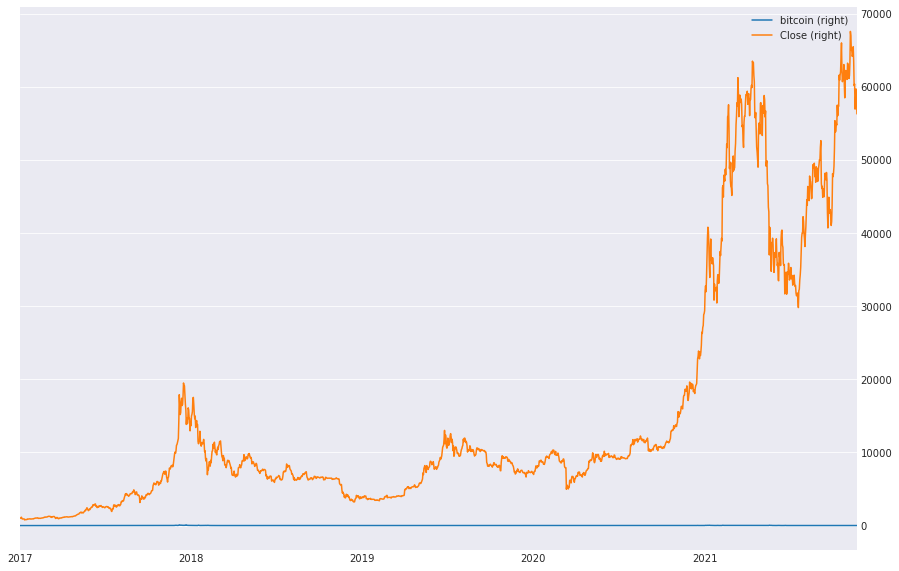

In [52]:
data[["bitcoin","Close"]].plot(figsize = (15,10),secondary_y=True )

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
sc = StandardScaler()
sc.fit(data[["bitcoin","Close"]])

StandardScaler()

In [55]:
std_data = pd.DataFrame(sc.transform(data[["bitcoin","Close"]]),index = data.index, columns = ["bitcoin","Close"])

<AxesSubplot:>

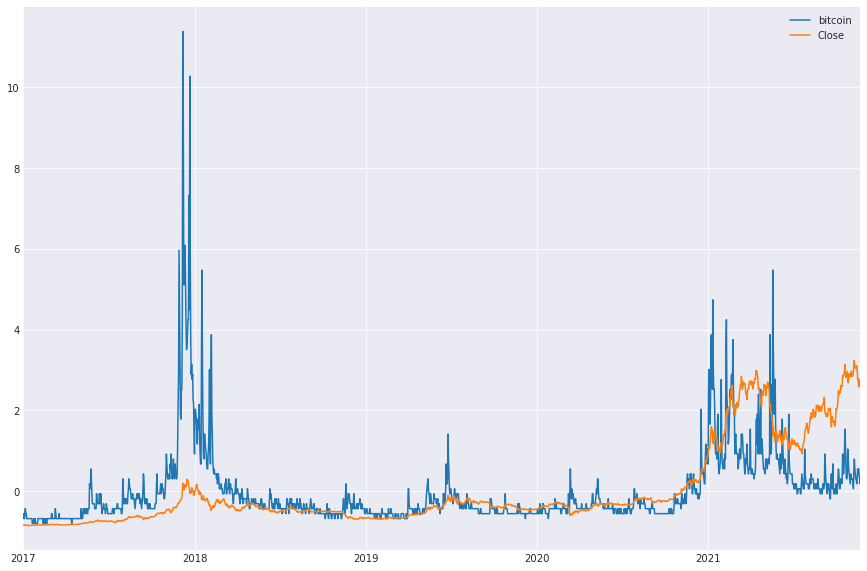

In [57]:
std_data.plot(figsize = (15,10))

In [101]:
import statsmodels.api as sm

models = dict()

for cryp in ["bitcoin","ethereum","tether"]:
    y = data['{}_Close'.format(cryp)]
    x1 = data[[cryp]]
    x = sm.add_constant(x1)
    models[cryp] = sm.OLS(y,x).fit()

C:\Users\Ksenija\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [103]:
models["bitcoin"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          bitcoin_Close   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     286.6
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           6.90e-59
Time:                        16:51:35   Log-Likelihood:                -16319.
No. Observations:                1475   AIC:                         3.264e+04
Df Residuals:                    1473   BIC:                         3.265e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.084e+04    554.616     19.543      0.000    9750.946    1.19e+04
bitcoin      783.2378     46.263     16.930      0.000     692.489     873.986
==============================================================================
Omnibus:                      276.887   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              519.573
Skew:                           1.132   Prob(JB):                    1.50e-113
Kurtosis:                       4.824   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
models["ethereum"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ethereum_Close   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2157.
Date:                Fri, 15 Apr 2022   Prob (F-statistic):          8.41e-291
Time:                        16:51:51   Log-Likelihood:                -11718.
No. Observations:                1475   AIC:                         2.344e+04
Df Residuals:                    1473   BIC:                         2.345e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        189.6884     22.623      8.385      0.000     145.311     234.066
ethereum      56.9314      1.226     46.445      0.000      54.527      59.336
==============================================================================
Omnibus:                      390.112   Durbin-Watson:                   0.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1893.906
Skew:                           1.159   Prob(JB):                         0.00
Kurtosis:                       8.044   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
models["tether"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           tether_Close   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8953
Date:                Fri, 15 Apr 2022   Prob (F-statistic):              0.344
Time:                        16:52:09   Log-Likelihood:                 5366.6
No. Observations:                1475   AIC:                        -1.073e+04
Df Residuals:                    1473   BIC:                        -1.072e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0025      0.001   1885.515      0.000       1.001       1.004
tether     -1.999e-05   2.11e-05     -0.946      0.344   -6.14e-05    2.14e-05
==============================================================================
Omnibus:                      814.391   Durbin-Watson:                   0.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31534.791
Skew:                           1.919   Prob(JB):                         0.00
Kurtosis:                      25.324   Cond. No.                         80.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
stats.pearsonr(data["tether"], data["tether_Close"])

(-0.024646874541398266, 0.34418818498585113)